In [48]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
% matplotlib inline

In [49]:
# Read cleaned data
ind_df = pd.read_csv('inc_cleaned_data.csv', sep='|')

In [50]:
ind_df.head()

,rank,name,revenue,industry,employees,founded,growth,city,state
0,1,Skillz,54.2,Software,58.0,2012.0,50059,San Francisco,CA
1,2,EnviroSolar Power,37.4,Energy,85.0,2012.0,36065,Fort Worth,TX
2,3,Gametime,48.8,Consumer Products & Services,75.0,2013.0,34021,San Francisco,CA
3,4,Club Pilates Franchise,26.8,Consumer Products & Services,31.0,2007.0,21319,Costa Mesa,CA
4,5,Halo Top Creamery,49.1,Food & Beverage,10.0,2012.0,20944,Los Angeles,CA


In [51]:
# Calculate previous revenue for companies based on on current revenue and growth values. Create separate column
# in dataframe.
ind_df.loc[:,('prev_revenue')] = ind_df.apply(lambda x: (100/(x['growth']+100)) * x['revenue'], axis=1).values

In [52]:
ind_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4997 entries, 0 to 4996
Data columns (total 10 columns):
rank            4997 non-null int64
name            4997 non-null object
revenue         4997 non-null float64
industry        4993 non-null object
employees       4861 non-null float64
founded         4994 non-null float64
growth          4997 non-null int64
city            4996 non-null object
state           4997 non-null object
prev_revenue    4997 non-null float64
dtypes: float64(4), int64(2), object(4)
memory usage: 390.5+ KB


In [53]:
ind_df.head()

,rank,name,revenue,industry,employees,founded,growth,city,state,prev_revenue
0,1,Skillz,54.2,Software,58.0,2012.0,50059,San Francisco,CA,0.108056
1,2,EnviroSolar Power,37.4,Energy,85.0,2012.0,36065,Fort Worth,TX,0.103415
2,3,Gametime,48.8,Consumer Products & Services,75.0,2013.0,34021,San Francisco,CA,0.143020
3,4,Club Pilates Franchise,26.8,Consumer Products & Services,31.0,2007.0,21319,Costa Mesa,CA,0.125123
4,5,Halo Top Creamery,49.1,Food & Beverage,10.0,2012.0,20944,Los Angeles,CA,0.233321


In [6]:
ind_df.groupby('industry').sum().sort_values(by='revenue', ascending=False)[['revenue','prev_revenue']]

,revenue,prev_revenue
industry,,
Financial Services,43175.9,22145.623016
Health,24568.8,10757.583275
Business Products & Services,19019.4,10261.731704
IT Services,15365.7,7241.802319
Construction,13009.3,6022.320729
Logistics & Transportation,12832.9,6601.203021
Consumer Products & Services,12296.3,5071.512327
Human Resources,12020.7,5645.312366
Government Services,10835.8,4552.813687


In [8]:

ind_revenue = ind_df.groupby('industry').sum().sort_values(by='revenue', ascending=False)
'''
plt.figure(figsize=(14,7))
sns.set_style("whitegrid")
sns.barplot(ind_revenue.index, ind_revenue['revenue'])
plt.tight_layout()
'''

'\nplt.figure(figsize=(14,7))\nsns.set_style("whitegrid")\nsns.barplot(ind_revenue.index, ind_revenue[\'revenue\'])\nplt.tight_layout()\n'

In [9]:
# industry wise average growth
ind_percent = ind_df.groupby('industry').apply(lambda x: ((x['revenue'].sum()-x['prev_revenue'].sum())/x['prev_revenue'].sum())*100).sort_values(ascending=False)
ind_percent

industry
Travel & Hospitality            200.920256
Media                           197.121897
Energy                          174.245285
Security                        171.343674
Real Estate                     167.822429
Telecommunications              165.427249
Advertising & Marketing         153.654136
Education                       152.470708
Consumer Products & Services    142.458249
Food & Beverage                 141.674652
Government Services             138.002272
Software                        134.207695
Environmental Services          130.773838
Retail                          130.313610
Health                          128.385869
Computer Hardware               117.000705
Construction                    116.018053
Human Resources                 112.932416
Insurance                       112.460202
IT Services                     112.180605
Engineering                      99.841377
Financial Services               94.963583
Logistics & Transportation       94.402444
Ma

In [10]:
'''
plt.figure(figsize=(14,10))
sns.barplot(ind_percent.index, ind_percent.values)
'''

'\nplt.figure(figsize=(14,10))\nsns.barplot(ind_percent.index, ind_percent.values)\n'

In [11]:
ind_df['industry'].value_counts()

IT Services                     598
Advertising & Marketing         493
Business Products & Services    474
Health                          395
Software                        328
Construction                    301
Financial Services              262
Government Services             240
Consumer Products & Services    239
Real Estate                     197
Human Resources                 186
Retail                          168
Logistics & Transportation      149
Manufacturing                   145
Food & Beverage                 137
Energy                           91
Insurance                        89
Telecommunications               86
Education                        74
Security                         68
Engineering                      67
Media                            65
Travel & Hospitality             63
Environmental Services           42
Computer Hardware                36
Name: industry, dtype: int64

In [12]:
'''
plt.figure(figsize=(10,10))
ind_df['industry'].value_counts().plot(kind='pie', colormap='Dark2')
plt.axis('equal')
'''

"\nplt.figure(figsize=(10,10))\nind_df['industry'].value_counts().plot(kind='pie', colormap='Dark2')\nplt.axis('equal')\n"

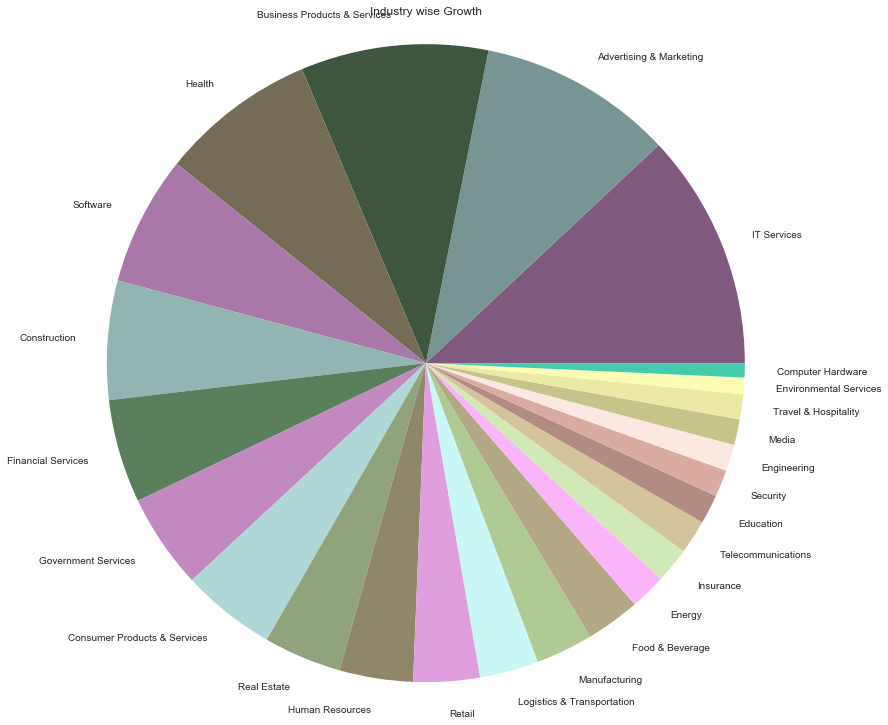

In [13]:
from matplotlib import cm
#plt.figure(figsize=(10,10))
fig, ax = plt.subplots(figsize=(10,10))
ax.set_prop_cycle(color=['#7F5A7E','#789594','#3E553F','#746C56','#A978A8','#92B4B3','#5B7E5D','#C189C0','#AFD7D6','#90A37C','#90866B','#DF9FDE','#C9F7F6','#B0CA94','#B4A785','#FAB4F9','#D1E9B7','#D4C49C','#B28B82','#DAABA1','#FAE8E1','#C4C48B','#EAEAA6','#FCFCB4','#44CBAE'])
ind_growth = ind_df['industry'].value_counts()
ax.pie(ind_growth, labels=ind_growth.index)
ax.axis('equal')
ax.set_title('Industry wise Growth')
plt.tight_layout()


In [14]:
ind_df.groupby('industry').describe()['growth']

,count,mean,std,min,25%,50%,75%,max
industry,,,,,,,,
Advertising & Marketing,493.0,454.507099,1282.605860,41.0,85.00,152.0,346.00,16981.0
Business Products & Services,474.0,431.320675,1086.115869,41.0,72.00,129.0,284.50,9935.0
Computer Hardware,36.0,342.638889,393.042139,44.0,89.75,183.5,376.75,1720.0
Construction,301.0,361.554817,725.911726,42.0,80.00,140.0,300.00,6611.0
Consumer Products & Services,239.0,696.958159,2708.965457,41.0,87.50,169.0,401.00,34021.0
Education,74.0,443.108108,748.842258,42.0,90.50,158.5,437.75,4654.0
Energy,91.0,1562.450549,4376.897271,43.0,117.50,284.0,827.50,36065.0
Engineering,67.0,206.149254,314.386572,42.0,63.50,99.0,213.00,2196.0
Environmental Services,42.0,220.928571,226.399969,43.0,74.25,136.5,272.00,963.0


In [16]:
np.append(ind_percent[(ind_percent.values > 100) & (ind_percent.values < 150)].index.values, [" "]*2)

array(['Consumer Products & Services', 'Food & Beverage',
       'Government Services', 'Software', 'Environmental Services',
       'Retail', 'Health', 'Computer Hardware', 'Construction',
       'Human Resources', 'Insurance', 'IT Services', ' ', ' '], dtype=object)

In [17]:
# table/dataframe to categorize industries according to growth with window of 25%
ind_tier_table = pd.DataFrame() #created empty dataframe

In [18]:
ind_tier_table['175-200'] = np.append(ind_percent[ind_percent.values > 175].index.values, [" "]*5)
ind_tier_table['150-175'] = np.append(ind_percent[(ind_percent.values > 150) & (ind_percent.values < 175)].index.values, [" "])
ind_tier_table['125-150'] = ind_percent[(ind_percent.values > 125) & (ind_percent.values < 150)].index
ind_tier_table['100-125'] = np.append(ind_percent[(ind_percent.values > 100) & (ind_percent.values < 125)].index.values, [" "]*2)
ind_tier_table['0-100'] = np.append(ind_percent[(ind_percent.values > 0) & (ind_percent.values < 100)].index.values, [" "]*2)

In [19]:
ind_tier_table

,175-200,150-175,125-150,100-125,0-100
0,Travel & Hospitality,Energy,Consumer Products & Services,Computer Hardware,Engineering
1,Media,Security,Food & Beverage,Construction,Financial Services
2,,Real Estate,Government Services,Human Resources,Logistics & Transportation
3,,Telecommunications,Software,Insurance,Manufacturing
4,,Advertising & Marketing,Environmental Services,IT Services,Business Products & Services
5,,Education,Retail,,
6,,,Health,,


In [20]:
ind_df.groupby('industry').mean().sort_values(by='employees', ascending=False)['employees']

industry
Security                        2395.746269
Human Resources                 1022.331492
Education                        529.082192
Food & Beverage                  384.197080
Health                           360.934555
Travel & Hospitality             359.803279
Financial Services               274.274131
Business Products & Services     272.166307
Logistics & Transportation       228.194444
Insurance                        221.568182
IT Services                      213.652705
Government Services              187.775424
Telecommunications               171.144578
Retail                           165.017857
Manufacturing                    162.416667
Media                            145.253968
Engineering                      139.000000
Energy                           130.112360
Software                         124.820513
Real Estate                      122.661538
Environmental Services           120.463415
Consumer Products & Services     114.576271
Construction           

In [21]:
ind_df.groupby('industry').mean().sort_values(by='founded', ascending=False)['founded']

industry
Computer Hardware               2005.555556
Media                           2005.461538
Energy                          2005.351648
Advertising & Marketing         2005.247465
Retail                          2005.244048
Software                        2005.179878
Real Estate                     2005.055838
Travel & Hospitality            2005.015873
Government Services             2004.741667
Health                          2004.601523
Security                        2004.470588
IT Services                     2004.342809
Consumer Products & Services    2004.305439
Education                       2004.189189
Food & Beverage                 2003.810219
Logistics & Transportation      2003.570470
Financial Services              2002.720307
Human Resources                 2002.650538
Telecommunications              2001.313953
Business Products & Services    2000.964135
Insurance                       1999.886364
Construction                    1999.438538
Environmental Services 

In [22]:
ind_df.groupby('industry').describe()['founded'].sort_values('mean')

,count,mean,std,min,25%,50%,75%,max
industry,,,,,,,,
Manufacturing,145.0,1993.917241,20.475088,1895.0,1990.00,2000.0,2007.0,2013.0
Engineering,67.0,1996.417910,15.149907,1953.0,1990.50,2002.0,2007.5,2013.0
Environmental Services,42.0,1999.333333,14.569709,1936.0,1994.00,2002.5,2008.0,2012.0
Construction,301.0,1999.438538,14.301994,1921.0,1992.00,2004.0,2010.0,2013.0
Insurance,88.0,1999.886364,17.845075,1869.0,1996.00,2005.0,2008.0,2013.0
Business Products & Services,474.0,2000.964135,17.533802,1840.0,1999.00,2005.0,2010.0,2013.0
Telecommunications,86.0,2001.313953,8.035600,1970.0,1999.00,2002.0,2006.0,2013.0
Human Resources,186.0,2002.650538,9.192325,1947.0,1999.00,2004.5,2009.0,2013.0
Financial Services,261.0,2002.720307,10.216236,1933.0,2000.00,2006.0,2009.0,2013.0


In [23]:
# growth of old vs new companies

In [24]:
# number of companies founded before 1990
len(ind_df[ind_df['founded']<=1990])

437

In [25]:
# number of companies founded between 1990 and 2010
len(ind_df[(ind_df['founded']<=2010) & (ind_df['founded']>1990)])

3580

In [26]:
# number of companies founded after 2010
len(ind_df[ind_df['founded']>2010])

977

In [27]:
437+3580+977

4994

In [28]:
# avg growth in companies founded before 1990
rev1, prev1 = ind_df[ind_df['founded']<=1990].sum()[['revenue','prev_revenue']]
growth1 = ((rev1 - prev1)/prev1)*100
print("percent growth: {}\trevenue: {}\tprevious revenue: {}".format(growth1, rev1, prev1))

percent growth: 84.18169465868372	revenue: 40795.9	previous revenue: 22149.812485763538


In [29]:
# avg growth in companies founded between 1990 and 2010
rev2, prev2 = ind_df[(ind_df['founded']<=2010) & (ind_df['founded']>1990)].sum()[['revenue','prev_revenue']]
growth2 = ((rev2 - prev2)/prev2)*100
print("percent growth: {}\trevenue: {}\tprevious revenue: {}".format(growth2, rev2, prev2))

percent growth: 125.73586647365838	revenue: 150322.7999999996	previous revenue: 66592.34190307153


In [30]:
# avg growth in companies founded after 2010
rev3, prev3 = ind_df[ind_df['founded']>2010].sum()[['revenue','prev_revenue']]
growth3 = ((rev3 - prev3)/prev3)*100
print("percent growth: {}\trevenue: {}\tprevious revenue: {}".format(growth3, rev3, prev3))

percent growth: 125.0841198897658	revenue: 41250.20000000001	previous revenue: 18326.570537362724


In [31]:
len(ind_df[ind_df['employees'] <= 500])

4534

In [32]:
len(ind_df[(ind_df['employees'] > 500) & (ind_df['employees'] <= 1000)])

182

In [33]:
len(ind_df[(ind_df['employees'] > 1000) & (ind_df['employees'] <= 10000)])

133

In [34]:
len(ind_df[ind_df['employees'] > 10000])

12

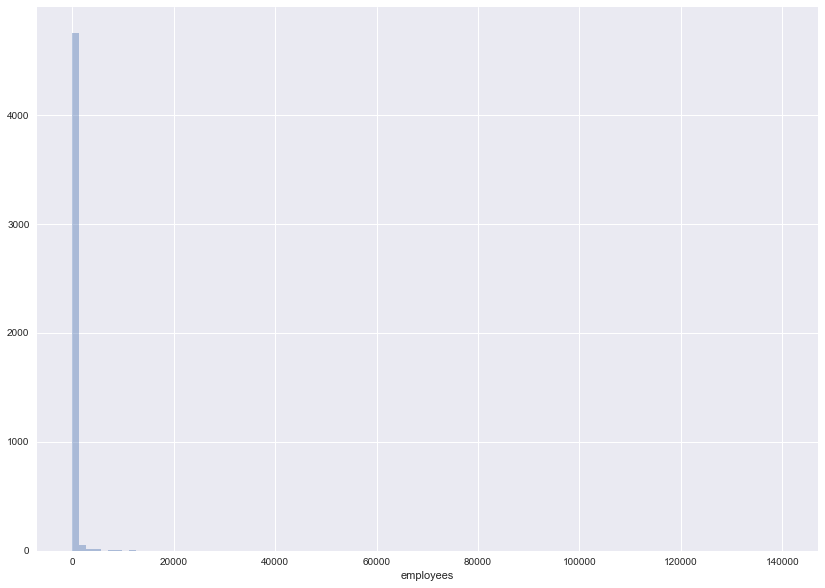

In [35]:
plt.figure(figsize=(14,10))
sns.distplot(ind_df['employees'].dropna(), kde=False, bins=100)

In [36]:
ind_df[ind_df['industry']=='Computer Hardware']

,rank,name,revenue,industry,employees,founded,growth,city,state,prev_revenue
247,249,Azulle,6.4,Computer Hardware,6.0,2013.0,1720,North Miami Beach,FL,0.351648
369,371,Aleph Objects,21.0,Computer Hardware,152.0,2011.0,1166,Loveland,CO,1.658768
382,384,Kopis Mobile,2.1,Computer Hardware,12.0,2013.0,1122,Flowood,MS,0.171849
486,488,Rigado,7.3,Computer Hardware,43.0,2010.0,914,Salem,OR,0.719921
516,518,Brydge,5.2,Computer Hardware,15.0,2012.0,861,Park City,UT,0.541103
566,568,Vantage Point,45.1,Computer Hardware,42.0,2006.0,793,Kenosha,WI,5.050392
636,638,ArterisIP,17.4,Computer Hardware,69.0,2013.0,710,Campbell,CA,2.148148
759,761,Mac Warehouse,10.0,Computer Hardware,38.0,2011.0,599,Sandy,UT,1.430615
1052,1054,FireFly Computers,32.5,Computer Hardware,30.0,2011.0,403,Saint Paul,MN,6.461233
1135,1137,King Memory,11.2,Computer Hardware,53.0,2009.0,368,Columbus,OH,2.393162


In [39]:
from pandas.plotting import table

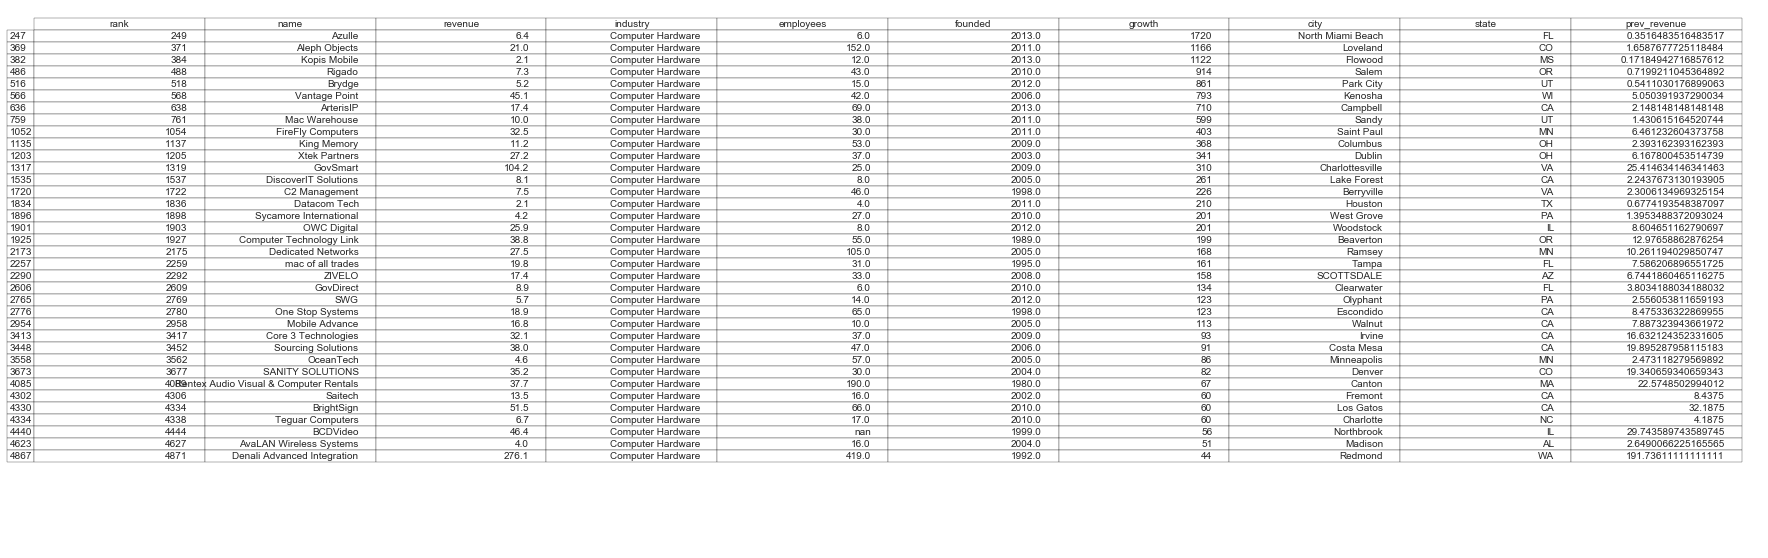

In [47]:
fig, ax2 = plt.subplots(figsize=(18, 10)) # set size frame
ax2.xaxis.set_visible(False)  # hide the x axis
ax2.yaxis.set_visible(False)  # hide the y axis
ax2.set_frame_on(False)  # no visible frame, uncomment if size is ok
tabla = table(ax2, ind_df[ind_df['industry']=='Computer Hardware'], loc='upper right', colWidths=[0.17]*len(ind_df[ind_df['industry']=='Computer Hardware'].columns))  # where df is your data frame
tabla.auto_set_font_size(False) # Activate set fontsize manually
#tabla.set_fontsize(12) # if ++fontsize is necessary ++colWidths
#tabla.scale(1.2, 1.2) # change size table
plt.savefig('table.png', transparent=True)